In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def plot_cores_vs_speed(df):
    N = [10,1e2,1e3,1e4,1e5,1e6,1e7,1e8,50000,500000,5000000,50000000]
    plt.figure(figsize=(7,7))
    for n in N:
        a = df.loc[df[0] == n]
        sum_df = a.groupby([1]).sum()
        sum_df[4] = sum_df[4]/10
        speedup = []
        cores = [1,2,3,4]
        vals = sum_df[3].values
        vals2 = sum_df[4].values
        for i in range(1,len(vals)):
            speedup.append(vals2[0]/vals2[i])
        plt.plot(cores,speedup,label=n)
        plt.grid(True)
        print(n , speedup[len(speedup)-1])
    plt.xlabel('Number of cores')
    plt.ylabel('Speedup')
    plt.title('Number of cores v/s Speedup for fixed problem size')
    plt.legend()
    plt.show()

In [11]:
def calculate_serial_parallel_fraction(df):
    N = [10,1e2,1e3,1e4,1e5,1e6,1e7,1e8,50000,500000,5000000,50000000]
    for n in N:
        a = df.loc[df[0] == n]
        sum_df = a.groupby([1]).sum()
        sum_df[5] = sum_df[5]/10
        vals = sum_df[4].values
        print(str(n) + '\t' + str(round(vals[0],7)))

10 0.03162682165074399
100.0 0.05190890145227083
1000.0 0.24345677344711245
10000.0 1.4984798787591875
100000.0 2.9498402462308384
1000000.0 3.3679606137109848
10000000.0 3.3740087471380904
100000000.0 3.4863981458482396
50000 2.8131140307088707
500000 3.542635916427035
5000000 3.1734208368540924
50000000 3.464290693626663


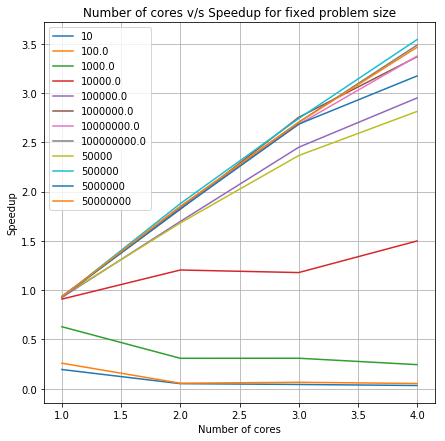

In [18]:
df = pd.read_csv('monte_carlo/combined_logs.csv',header=None)
df[4] = df[2] + df[4]
df[3] = df[2] + df[3]
plot_cores_vs_speed(df)

In [14]:
df = pd.read_csv('monte_carlo/combined_logs.csv',header=None)
df[4] = df[4] + df[2]
df[3] = df[3] + df[2]
df[5] = (df[3] - df[4]) / df[3]
calculate_serial_parallel_fraction(df)

10	2.47e-05
100.0	3.33e-05
1000.0	0.0001658
10000.0	0.0014624
100000.0	0.0142974
1000000.0	0.1390354
10000000.0	1.3260173
100000000.0	13.1398037
50000	0.0073823
500000	0.0701721
5000000	0.6644158
50000000	6.5823775
